In [1]:
!pip install ultralytics
from ultralytics import YOLO



In [2]:
from IPython.display import display,Image

In [3]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/objects.png"

Ultralytics YOLOv8.0.160 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/objects.png: 480x640 1 bowl, 1 book, 623.4ms
Speed: 13.5ms preprocess, 623.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3


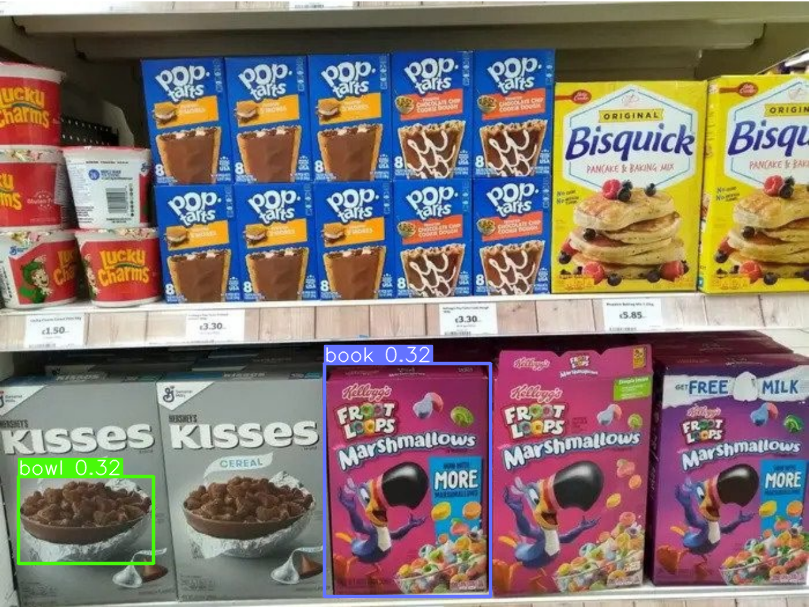

In [4]:
image ='/content/runs/detect/predict/objects.png'
Image(filename=image,height=400)

In [40]:
import cv2
import json


image_path = "/content/objects.png"
image = cv2.imread(image_path)


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/objects.png"

# Calculate width and height of objects
results = []
for i, (x, y, w, h) in enumerate(faces):
    width = int(w)
    height = int(h)
    object_id = int(i)

    # Save results in a list
    results.append({'object_id': object_id, 'width': width, 'height': height})

# Save results in a txt file


output_path = "/content/runs/detect/results.txt"

# Convert results to a string format
results_str = str(results)

# Write results to the file
with open(output_path, 'w') as text_file:
    text_file.write(results_str)

print("Results saved in", output_path)

Ultralytics YOLOv8.0.160 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/objects.png: 480x640 1 bowl, 1 book, 232.0ms
Speed: 6.5ms preprocess, 232.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict24
Results saved in /content/runs/detect/results.txt


In [44]:
with open('/content/runs/detect/results.txt', 'r') as file:
    data = file.read()

parsed_data = data.split('\n')

import json

json_data = json.dumps(parsed_data)

with open('/content/object_dimensions.json', 'w') as file:
    file.write(json_data)